In [ ]:
### Paper Visualizations

import matplotlib.pyplot as plt

# Simulación de datos (reemplaza con los tuyos)
k_values = list(range(1, 16))
llm_acc = [0.75, 0.78, 0.81, 0.83, 0.85, 0.86, 0.87, 0.88, 0.88, 0.89, 0.89, 0.89, 0.90, 0.90, 0.90]
knn_acc = [0.70, 0.73, 0.75, 0.76, 0.77, 0.78, 0.78, 0.79, 0.79, 0.79, 0.80, 0.80, 0.80, 0.80, 0.80]
vote_acc = [0.68, 0.71, 0.73, 0.74, 0.75, 0.76, 0.76, 0.76, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77]

plt.figure(figsize=(6, 4))
plt.plot(k_values, llm_acc, label="LLM", linewidth=2)
plt.plot(k_values, knn_acc, label="KNN", linewidth=2, linestyle="--")
plt.plot(k_values, vote_acc, label="Voting Model", linewidth=2, linestyle=":")
plt.xlabel("k (Top-k)")
plt.ylabel("Accuracy")
plt.title("Top-k Accuracy vs. k")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("topk_accuracy.pdf")  # Archivo listo para incluir en LaTeX
plt.show()


In [2]:
data

,k,Accuracy,Model
0,1,0.75,LLM
1,2,0.78,LLM
2,3,0.81,LLM
3,4,0.83,LLM
4,5,0.85,LLM
5,6,0.86,LLM
6,7,0.87,LLM
7,8,0.88,LLM
8,9,0.88,LLM
9,10,0.89,LLM


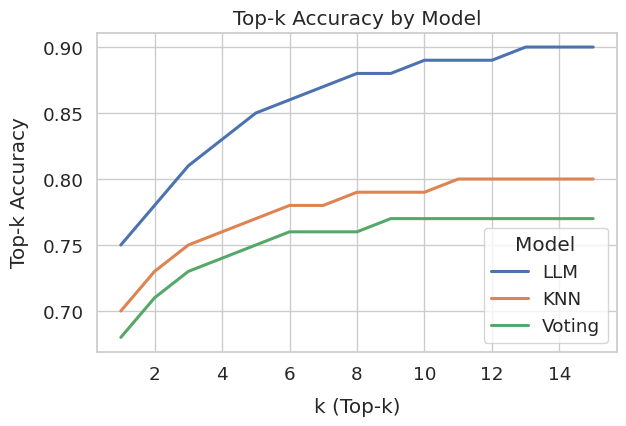

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Simulación de datos (reemplaza con los tuyos)
k = list(range(1, 16))
data = pd.DataFrame({
    "k": k * 3,
    "Accuracy": (
        [0.75, 0.78, 0.81, 0.83, 0.85, 0.86, 0.87, 0.88, 0.88, 0.89, 0.89, 0.89, 0.90, 0.90, 0.90] +
        [0.70, 0.73, 0.75, 0.76, 0.77, 0.78, 0.78, 0.79, 0.79, 0.79, 0.80, 0.80, 0.80, 0.80, 0.80] +
        [0.68, 0.71, 0.73, 0.74, 0.75, 0.76, 0.76, 0.76, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77, 0.77]
    ),
    "Model": (
        ["LLM"] * 15 +
        ["KNN"] * 15 +
        ["Voting"] * 15
    )
})

# Estilo Seaborn
sns.set(style="whitegrid", font_scale=1.2)
plt.figure(figsize=(6.5, 4.5))

# Línea por modelo
sns.lineplot(data=data, x="k", y="Accuracy", hue="Model", linewidth=2.2)

# Ejes y leyenda
plt.xlabel("k (Top-k)", labelpad=10)
plt.ylabel("Top-k Accuracy", labelpad=10)
plt.title("Top-k Accuracy by Model")
plt.legend(title="Model")
plt.tight_layout()

# Exportar como PDF para incluir en LaTeX
plt.savefig("topk_accuracy_seaborn.pdf", bbox_inches="tight")
plt.show()


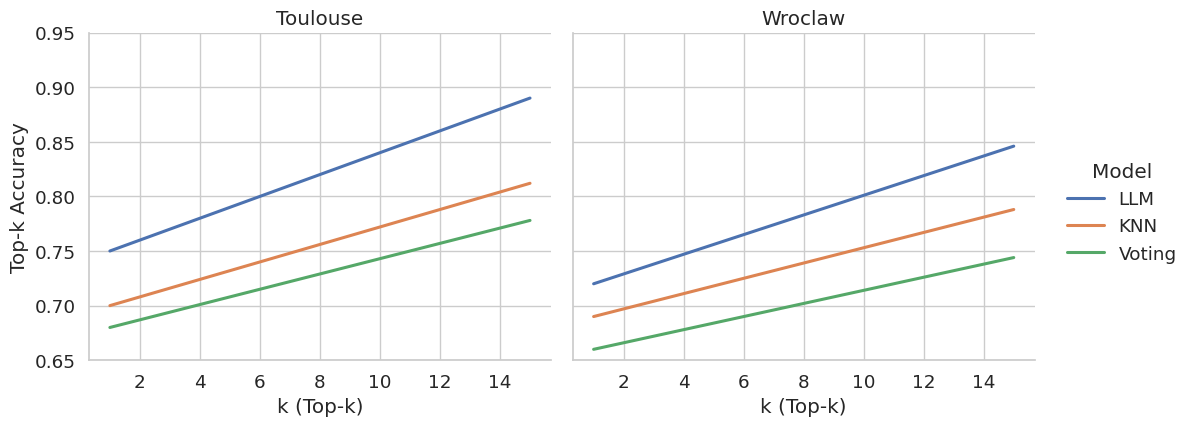

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Simulación de datos
k = list(range(1, 16))

# Repite para cada modelo y ciudad
def generate_block(acc_list, model, city):
    return pd.DataFrame({
        "k": k,
        "Accuracy": acc_list,
        "Model": model,
        "City": city
    })

# Datos ficticios (reemplaza con los reales)
df = pd.concat([
    generate_block([0.75 + i*0.01 for i in range(15)], "LLM", "Toulouse"),
    generate_block([0.70 + i*0.008 for i in range(15)], "KNN", "Toulouse"),
    generate_block([0.68 + i*0.007 for i in range(15)], "Voting", "Toulouse"),
    generate_block([0.72 + i*0.009 for i in range(15)], "LLM", "Wroclaw"),
    generate_block([0.69 + i*0.007 for i in range(15)], "KNN", "Wroclaw"),
    generate_block([0.66 + i*0.006 for i in range(15)], "Voting", "Wroclaw"),
])

# Estilo general
sns.set(style="whitegrid", font_scale=1.2)

# Gráfico con paneles por ciudad
g = sns.relplot(
    data=df,
    x="k", y="Accuracy", hue="Model", kind="line", col="City",
    facet_kws={'sharey': True, 'sharex': True},
    linewidth=2.2,
    height=4.5, aspect=1.2
)

# Ajustes estéticos
g.set_axis_labels("k (Top-k)", "Top-k Accuracy")
g.set_titles(col_template="{col_name}")
g.set(ylim=(0.65, 0.95))
g.tight_layout()

# Guardar como PDF
plt.savefig("topk_accuracy_by_city.pdf", bbox_inches="tight")
plt.show()


In [ ]:
results = p

,Top-k,Accuracy,Model,City
0,1,0.545,Simple Prompt,Toulouse
1,2,0.540,Simple Prompt,Toulouse
2,3,0.535,Simple Prompt,Toulouse
3,4,0.530,Simple Prompt,Toulouse
4,5,0.525,Simple Prompt,Toulouse
5,6,0.520,Simple Prompt,Toulouse
6,7,0.515,Simple Prompt,Toulouse
7,8,0.510,Simple Prompt,Toulouse
8,9,0.505,Simple Prompt,Toulouse
9,10,0.500,Simple Prompt,Toulouse


In [2]:
import pandas as pd
df_results = pd.read_csv('results/topk_results_by_model.csv')
df_results

# Reemplazar comas por puntos y convertir columnas numéricas a float
for col in ['Accuracy', 'Recall', 'F1', 'Jaccard']:
    df_results[col] = df_results[col].astype(str).str.replace(',', '.').astype(float)

print(df_results.head())

   Top-k  Accuracy  Recall    F1  Jaccard          Model      City
0      1      1.00    1.00  1.00     1.00  GPT4 Turbo SP  Toulouse
1      2      0.95    0.50  0.50     0.33  GPT4 Turbo SP  Toulouse
2      3      0.89    0.33  0.33     0.20  GPT4 Turbo SP  Toulouse
3      4      0.84    0.25  0.25     0.14  GPT4 Turbo SP  Toulouse
4      5      0.84    0.40  0.40     0.25  GPT4 Turbo SP  Toulouse


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams["font.family"] = "Times New Roman"

colors = {
    "GPT4 Turbo SP": "#ff6361",
    "RAG CoT": "#ffa600",      
    "KNN-15": "#333333",                 
    "Prob": "#58508d"
}

cities = df_results["City"].unique()
models = df_results["Model"].unique()

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
#colors = plt.cm.tab10.colors 


for ax, city in zip(axes, cities):
    city_df = df_results[df_results["City"] == city]
    for idx, model in enumerate(models):
        model_df = city_df[city_df["Model"] == model]
        ax.plot(
            model_df["Top-k"],
            model_df["Accuracy"],
            label=model,
            marker="o",
            linewidth=2,
            color = colors.get(model, "#333333") 
        )
    ax.set_title(city)
    ax.set_xlabel("Top-K")
    ax.set_ylim(0, 1.05)
    ax.grid(True)

axes[0].set_ylabel("Accuracy")
fig.suptitle("Top-K Accuracy by Model and City", fontsize=14)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.08), title="Model")

fig.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


NameError: name 'df_results' is not defined

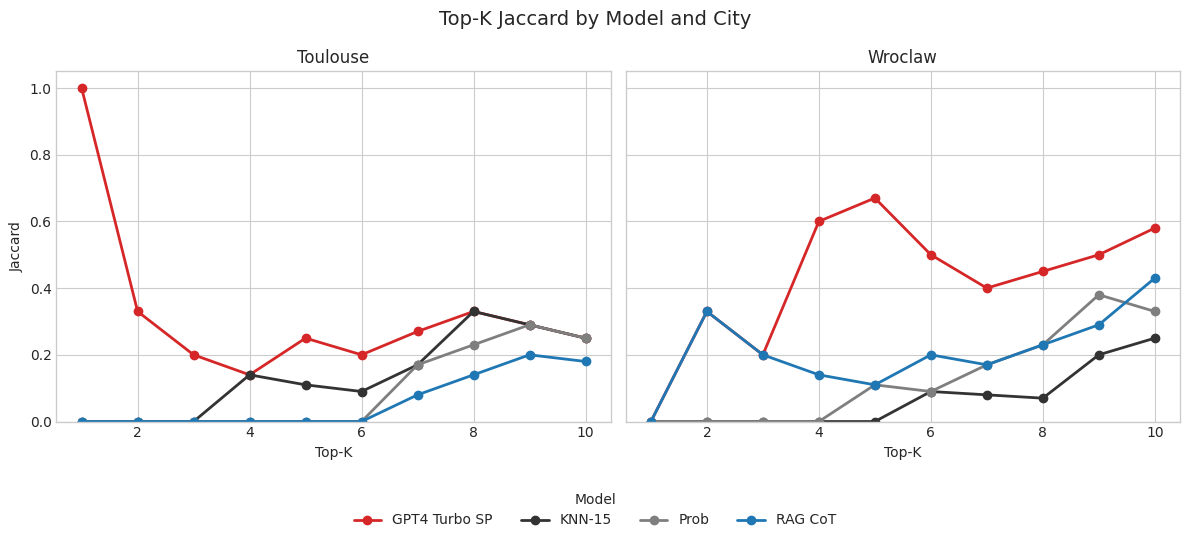

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")

colors = {
    "GPT4 Turbo SP": "#d62728",
    "RAG CoT": "#1f77b4",      
    "KNN-15": "#333333",                 
    "Prob": "#7f7f7f"
}

cities = df_results["City"].unique()
models = df_results["Model"].unique()

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
#colors = plt.cm.tab10.colors 


for ax, city in zip(axes, cities):
    city_df = df_results[df_results["City"] == city]
    for idx, model in enumerate(models):
        model_df = city_df[city_df["Model"] == model]
        ax.plot(
            model_df["Top-k"],
            model_df["Jaccard"],
            label=model,
            marker="o",
            linewidth=2,
            color = colors.get(model, "#333333") 
        )
    ax.set_title(city)
    ax.set_xlabel("Top-K")
    ax.set_ylim(0, 1.05)
    ax.grid(True)

axes[0].set_ylabel("Jaccard")
fig.suptitle("Top-K Jaccard by Model and City", fontsize=14)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=4, bbox_to_anchor=(0.5, -0.08), title="Model")

fig.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()


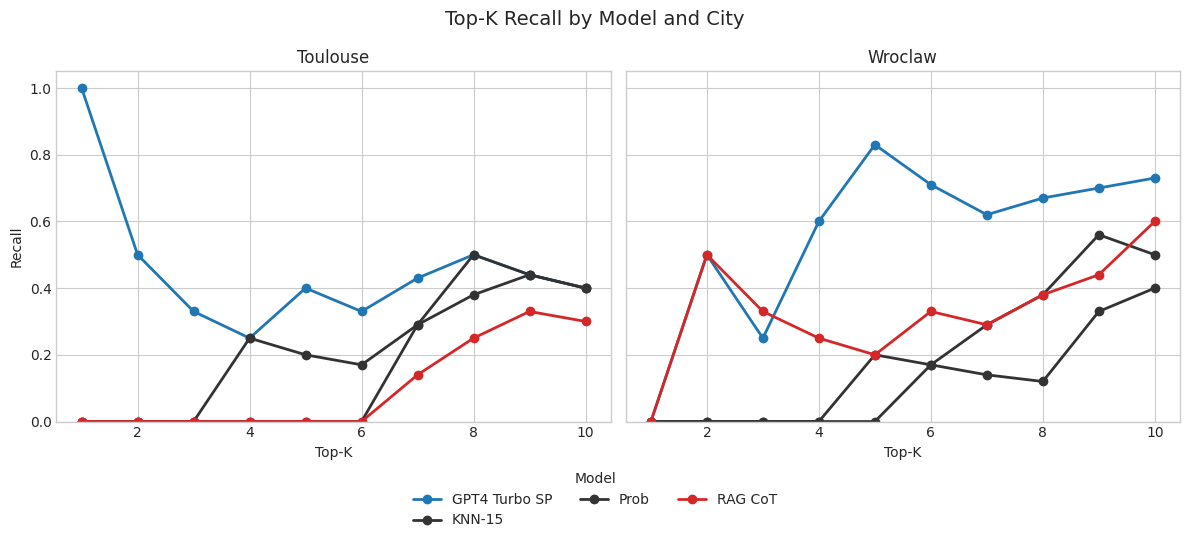

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")

colors = {
    "GPT4 Turbo SP": "#1f77b4",       # azul
    "RAG CoT": "#d62728",      # rojo
    "KNN": "#7f7f7f",                 # gris medio
    "Probabilistic Model": "#b0b0b0"  # gris claro
}

cities = df_results["City"].unique()
models = df_results["Model"].unique()

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
#colors = plt.cm.tab10.colors 


for ax, city in zip(axes, cities):
    city_df = df_results[df_results["City"] == city]
    for idx, model in enumerate(models):
        model_df = city_df[city_df["Model"] == model]
        ax.plot(
            model_df["Top-k"],
            model_df["Recall"],
            label=model,
            marker="o",
            linewidth=2,
            color = colors.get(model, "#333333") 
        )
    ax.set_title(city)
    ax.set_xlabel("Top-K")
    ax.set_ylim(0, 1.05)
    ax.grid(True)

axes[0].set_ylabel("Recall")
fig.suptitle("Top-K Recall by Model and City", fontsize=14)
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc="lower center", ncol=3, bbox_to_anchor=(0.5, -0.08), title="Model")

fig.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()
